## Drifters and Cmems data Notebook

### Introduction
This notebook aims to analyze the velocity data from drifters within the tropical Atlantic Ocean. It involves visualizing drifter velocity data, interpolating CMEMS data onto drifter data, and comparing the velocities between drifters and CMEMS.

### Data Sources
- Drifter Data:
  - Source: NOAA
  - Collection Frequency: Every 6 hours
  - Total Number of Drifters: 221

- CMEMS Data:
  - Source: Copernicus Marine
  - Collection Frequency: Every 12 hours
  - Data Product: SEALEVEL_GLO_PHY_L4_MY_008_047

### Tasks

#### 1. Visualization of Drifter Velocity Data
- Plot the Eastward (ve) and Northward (vn) velocity as a function of time for a selected drifter.

#### 2. Interpolation of CMEMS Data on Drifter Data
- Interpolate CMEMS data onto the time series of the selected drifter data.

#### 3. Comparison between Drifter Velocities and Interpolated CMEMS Velocities
- Visualize the correlation and regression between drifter velocities (ve, vn) and interpolated CMEMS between the two datasets.
- Plot time series of both drifter velocities and interpolated CMEMS velocities.

## Import Library


In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from cartopy import config
import matplotlib.animation
from scipy.stats import linregress

## Read Drifter Data


In [2]:
fn='./drifter_6hour_qc_893c_d15d_c4b7_U1711967648742.nc';
ds=xr.open_dataset(fn);

## Extract Coordinates and Variables


In [3]:
ve_curr = ds.ve.values
vn_curr = ds.vn.values
sst = ds.sst.values
lon = ds.longitude.values
lat = ds.latitude.values
time = ds.time.values

## Creation of Pandas Array for Drifter Data


In [4]:
data = {
    'longitude': lon,
    'latitude' : lat,
    'time'     : time,
    've'       : ve_curr,
    'vn'       : vn_curr,
    'sst'      : sst
}

df = pd.DataFrame(data)
df

,longitude,latitude,time,ve,vn,sst
0,-14.478,-18.548,2023-01-01 00:00:00,-0.13760,-0.07635,23.612
1,-14.499,-18.556,2023-01-01 06:00:00,-0.09969,0.01322,23.564
2,-14.519,-18.543,2023-01-01 12:00:00,-0.15719,0.08193,23.699
3,-14.563,-18.524,2023-01-01 18:00:00,-0.26155,0.03533,23.856
4,-14.626,-18.529,2023-01-02 00:00:00,-0.23922,-0.07837,23.717
...,...,...,...,...,...,...
78378,-22.006,-19.946,2023-06-11 12:00:00,-0.03853,-0.05076,25.189
78379,-22.013,-19.961,2023-06-11 18:00:00,-0.05150,-0.06262,25.179
78380,-22.027,-19.971,2023-06-12 00:00:00,-0.06030,-0.04773,25.133
78381,-22.038,-19.980,2023-06-12 06:00:00,-0.06036,-0.05688,25.093


## Selecting Drifter Data


In [5]:
# Test: Our selected drifter has 1102 observations. However, we will limit it to 158 observations because the coordinates 
# of our CMEMS data are 158 in dimension, and the linear interpolation method we use requires it in this situation.

df_1 = df[0:158]
df_1

,longitude,latitude,time,ve,vn,sst
0,-14.478,-18.548,2023-01-01 00:00:00,-0.13760,-0.07635,23.612
1,-14.499,-18.556,2023-01-01 06:00:00,-0.09969,0.01322,23.564
2,-14.519,-18.543,2023-01-01 12:00:00,-0.15719,0.08193,23.699
3,-14.563,-18.524,2023-01-01 18:00:00,-0.26155,0.03533,23.856
4,-14.626,-18.529,2023-01-02 00:00:00,-0.23922,-0.07837,23.717
...,...,...,...,...,...,...
153,-17.671,-18.700,2023-02-08 06:00:00,-0.11487,-0.00411,25.657
154,-17.695,-18.704,2023-02-08 12:00:00,-0.09986,-0.02095,25.741
155,-17.711,-18.708,2023-02-08 18:00:00,-0.02361,0.00256,25.866
156,-17.705,-18.703,2023-02-09 00:00:00,-0.01014,0.08457,25.758


## Time Series of Eastward (ve) and Northward (vn) Velocity for Our Drifter 

## Case of ve

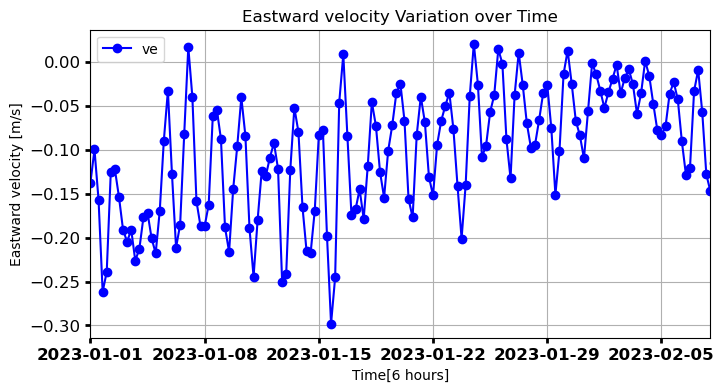

In [6]:
# Assuming you have a DataFrame named df with 'time' and 've' columns

# Plot ve as a function of time
plt.figure(figsize=(8, 4))
plt.plot(df_1['time'], df_1['ve'], color='blue', marker='o', linestyle='-')

# Add title, axis labels, grid and legend
plt.title('Eastward velocity Variation over Time')
plt.xlabel('Time[6 hours]')
plt.ylabel('Eastward velocity [m/s]')
plt.grid(True)

plt.legend(['ve'])

# Set font size and font weight directly on the Axes object
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Set x-axis limits and tick labels
ax.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-02-08'))
ax.set_xticks(pd.date_range(start='2023-01-01', end='2023-02-08', freq='168H'))
ax.set_xticklabels(pd.date_range(start='2023-01-01', end='2023-02-08', freq='168H').strftime('%Y-%m-%d'), rotation=0)

# save graphe
plt.savefig("fig7 mode.png")
# Show plot
plt.show()

## Case of vn

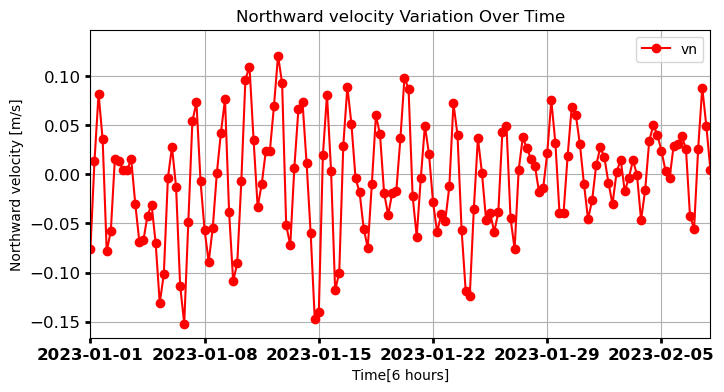

In [7]:
# Assuming you have a DataFrame named df with 'time' and 've' columns

# Plot ve as a function of time
plt.figure(figsize=(8, 4))
plt.plot(df_1['time'], df_1['vn'], color='red', marker='o', linestyle='-')

# Add title, axis labels, grid and legend
plt.title('Northward velocity Variation Over Time')
plt.xlabel('Time[6 hours]')
plt.ylabel('Northward velocity [m/s]')
plt.grid(True)

plt.legend(['vn'])

# Set font size and font weight directly on the Axes object
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Set x-axis limits and tick labels
ax.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-02-08'))
ax.set_xticks(pd.date_range(start='2023-01-01', end='2023-02-08', freq='168H'))
ax.set_xticklabels(pd.date_range(start='2023-01-01', end='2023-02-08', freq='168H').strftime('%Y-%m-%d'), rotation=0)

# save graphe
plt.savefig("fig8 mode.png")
# Show plot
plt.show()

## Now let's interpolate the CMEMS data onto the grid of the drifter data.

### Case of Geostrophic Velocity Anomalies: Zonal Component (ugosa) to Eastward Velocity (ve)


- In this step, we interpolate the ugosa variable from the CMEMS data to the ve variable of the selected drifter.

- We utilize the linear interpolation method for this process. The interpolation is performed based on the variables of longitude, latitude, and important timestamps.

- This allows us to make comparisons and identify differences between drifter variables and CMEMS variables obtained through interpolations.

C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_10688\1623809422.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['ugosa'] = mean_ugosa_2


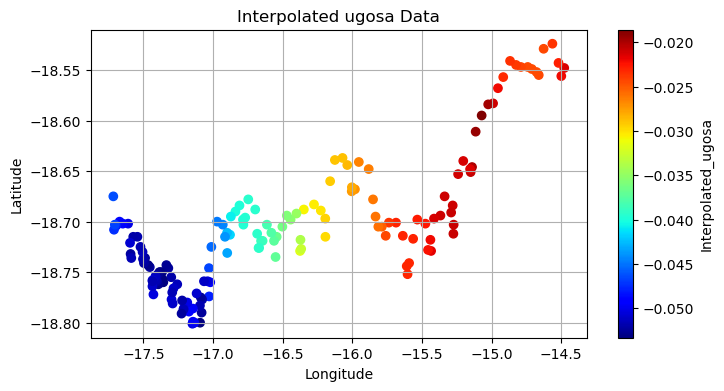

In [10]:
from scipy.interpolate import griddata

# Load your netCDF data
data = xr.open_dataset('cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1713524113026.nc')
# reduce the dimention of data frame to have the same result like cmems
# Define your dataframe, assuming it has columns 'longitude', 'latitude' and time
# Replace df with your dataframe variable name and adjust column names accordingly

# Interpolate netCDF data onto the dataframe's coordinates
# Assuming netCDF data has dimensions 'time', 'longitude' and 'latitude'
interpolated_data = data.interp(latitude=df_1['latitude'], longitude=df_1['longitude'], time=df_1['time'], method='linear')

# Extract interpolated values
interpolated_values_ugosa = interpolated_data['ugosa'].values

# Add interpolated values to your dataframe
# note that interpolated_variable is a function of time, longitude and latitude. 
# We average over longitude and latitude to have it over time and has a dimension

mean_ugosa_2=np.mean(interpolated_values_ugosa, axis=(1, 2))
df_1['ugosa'] = mean_ugosa_2

# Plot the interpolated data
plt.figure(figsize=(8, 4))
plt.scatter(df_1['longitude'], df_1['latitude'], c= mean_ugosa_2, cmap='jet', marker='o')

# Add title, axis labels, grid and colorbar
plt.title('Interpolated ugosa Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.colorbar(label='Interpolated_ugosa')

# save graphe
plt.savefig("fig9 mode.png")
# Show plot
plt.show()

### Case of Geostrophic Velocity Anomalies: Meridional Component (vgosa) to Northward Velocity (vn)

C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_10688\3281136612.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['vgosa'] = mean_vgosa_2


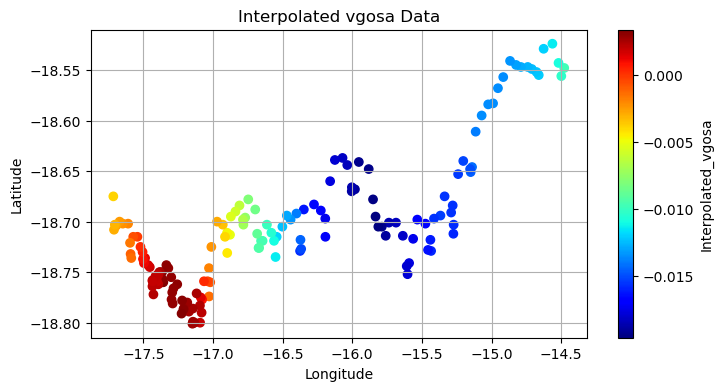

In [11]:
from scipy.interpolate import griddata

# Load your netCDF data
data = xr.open_dataset('cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1713524113026.nc')
# reduce the dimention of data frame to have the same result like cmems
# Define your dataframe, assuming it has columns 'longitude', 'latitude' and time
# Replace df with your dataframe variable name and adjust column names accordingly


# Interpolate netCDF data onto the dataframe's coordinates
# Assuming netCDF data has dimensions 'longitude' and 'latitude'
interpolated_data = data.interp(latitude=df_1['latitude'], longitude=df_1['longitude'], time=df_1['time'], method='linear')

# Extract interpolated values
interpolated_values_vgosa = interpolated_data['vgosa'].values

# Add interpolated values to your dataframe
# note that interpolated_variable is a function of time, longitude and latitude. 
# We average over longitude and latitude to have it over time and has a dimension

mean_vgosa_2=np.mean(interpolated_values_vgosa, axis=(1, 2))
df_1['vgosa'] = mean_vgosa_2

# Plot the interpolated data
plt.figure(figsize=(8, 4))
plt.scatter(df_1['longitude'], df_1['latitude'], c= mean_vgosa_2, cmap='jet', marker='o')

# Add title, axis labels, grid and colorbar
plt.title('Interpolated vgosa Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.colorbar(label='Interpolated_vgosa')

# save graphe
plt.savefig("fig10 mode.png")
# Show plot
plt.show()

## Time Series of Interpolated_ugosa


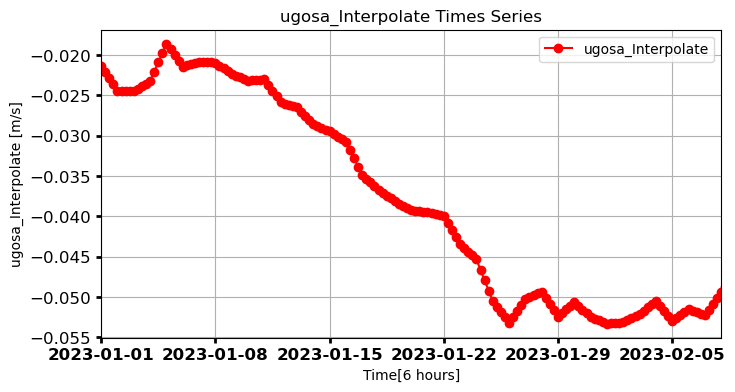

In [12]:
# Assuming you have a DataFrame named df with 'time' and 'vgosa' columns
df_1 = df[0:158]

# Plot ugosa as a function of time
plt.figure(figsize=(8, 4))
plt.plot(df_1['time'], mean_ugosa_2, color='red', marker='o', linestyle='-')

# Add title, axis labels, grid and legend
plt.title('ugosa_Interpolate Times Series')
plt.xlabel('Time[6 hours]')
plt.ylabel('ugosa_Interpolate [m/s]')
plt.grid(True)

plt.legend(['ugosa_Interpolate'])


# Set font size and font weight directly on the Axes object
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Set x-axis limits and tick labels
ax.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-02-08'))
ax.set_xticks(pd.date_range(start='2023-01-01', end='2023-02-08', freq='168H'))
ax.set_xticklabels(pd.date_range(start='2023-01-01', end='2023-02-08', freq='168H').strftime('%Y-%m-%d'), rotation=0)

# save graphe
plt.savefig("fig11 mode.png")
# Show plot
plt.show()

## Time Series of Interpolated vgosa


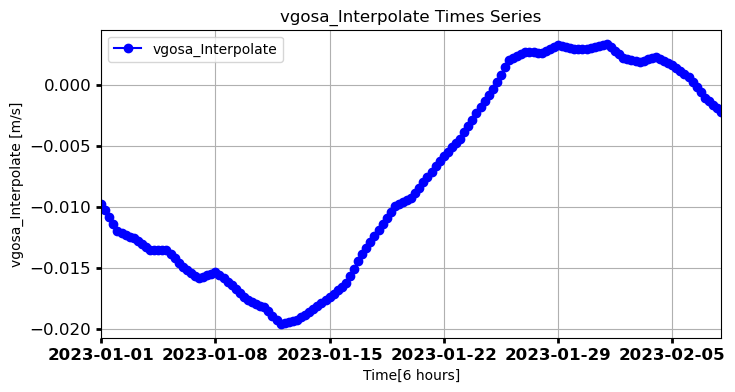

In [13]:
# Assuming you have a DataFrame named df with 'time' and 'vgosa' columns
df_1 = df[0:158]

# Plot ugosa as a function of time
plt.figure(figsize=(8, 4))
plt.plot(df_1['time'], mean_vgosa_2, color='blue', marker='o', linestyle='-')

# Add title, axis labels, grid and legend
plt.title('vgosa_Interpolate Times Series')
plt.xlabel('Time[6 hours]')
plt.ylabel('vgosa_Interpolate [m/s]')
plt.grid(True)

plt.legend(['vgosa_Interpolate'])


# Set font size and font weight directly on the Axes object
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Set x-axis limits and tick labels
ax.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-02-08'))
ax.set_xticks(pd.date_range(start='2023-01-01', end='2023-02-08', freq='168H'))
ax.set_xticklabels(pd.date_range(start='2023-01-01', end='2023-02-08', freq='168H').strftime('%Y-%m-%d'), rotation=0)

# save graphe
plt.savefig("fig12 mode.png")
# Show plot
plt.show()

## Now Let's Compare Drifter Speeds and Interpolated CMEMS Speeds

## Comparison between ve and ugosa_Interpolate


## Using Regression and Correlation


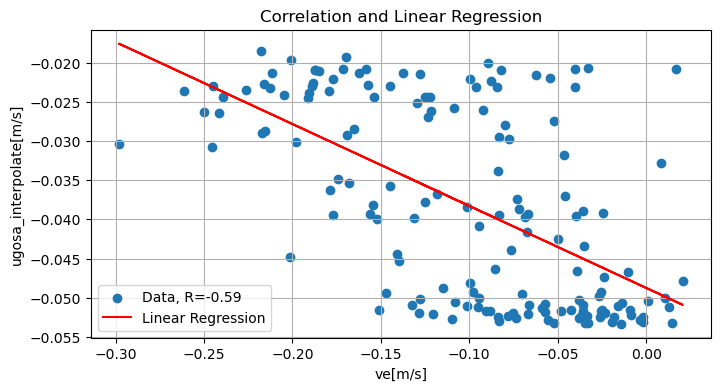

In [14]:
# According to the following, we can simply note that the correlation between "ve" and "ugosa_interpolate" is -0.59. 
# This implies a moderate inverse relationship between the variables. It means that when the value of one variable increases,
# the value of the other variable decreases, and vice versa, but not in a perfectly linear manner.
# Calculate correlation coefficient
correlation_matrix = np.corrcoef(mean_ugosa_2,df_1['ve'])
correlation = correlation_matrix[0, 1]

# Fit linear regression model

slope, intercept, _, _, _ = linregress( df_1['ve'],mean_ugosa_2)

# Plot data and linear regression line
plt.figure(figsize=(8, 4))
plt.scatter(df_1['ve'],mean_ugosa_2, label=f'Data, R={correlation:.2f}')
plt.plot(df_1['ve'], slope*df_1['ve'] + intercept, color='red', label='Linear Regression')
plt.xlabel('ve[m/s]')
plt.ylabel('ugosa_interpolate[m/s]')
plt.legend()
plt.title('Correlation and Linear Regression')
plt.grid(True)

# Set font size and font weight for tick labels
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'

# save graphe
plt.savefig("fig13 mode.png")
# Show plot
plt.show()

## Using Time Series

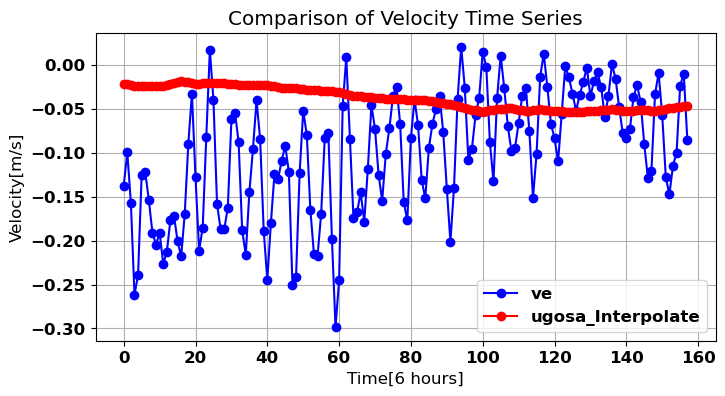

In [15]:
 # Plot time series
plt.figure(figsize=(8, 4))
plt.plot(df_1['ve'], color='Blue', marker='o', linestyle='-',label='ve')
plt.plot(mean_ugosa_2, color='RED', marker='o', linestyle='-', label='ugosa_Interpolate')
plt.legend([f'Correlation: {correlation:.2f}'], loc='upper left')

# Add title, axis labels, grid and legend 
plt.title('Comparison of Velocity Time Series')
plt.xlabel('Time[6 hours]')
plt.ylabel('Velocity[m/s]')
plt.grid(True)
plt.legend()

# save graphe
plt.savefig("fig14 mode.png")
# Show plot
plt.show()

### The use of Kalman filter for smoothing $v_e$

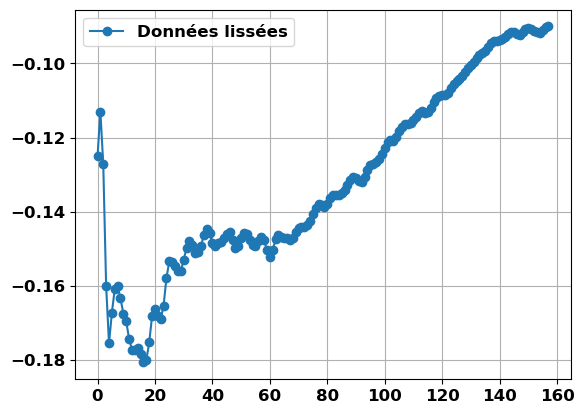

In [20]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter:
    def __init__(self, process_variance, measurement_variance, estimated_measurement_variance):
        self.process_variance = process_variance
        self.measurement_variance = measurement_variance
        self.estimated_measurement_variance = estimated_measurement_variance
        self.posteri_estimate = 0.0
        self.posteri_error_estimate = 1.0

    def update(self, measurement):
        # Prediction update
        priori_estimate = self.posteri_estimate
        priori_error_estimate = self.posteri_error_estimate + self.process_variance

        # Measurement update
        blending_factor = priori_error_estimate / (priori_error_estimate + self.estimated_measurement_variance)
        self.posteri_estimate = priori_estimate + blending_factor * (measurement - priori_estimate)
        self.posteri_error_estimate = (1 - blending_factor) * priori_error_estimate

    def get_latest_estimated_measurement(self):
        return self.posteri_estimate

# Charger la série temporelle
# Supposons que votre série temporelle est dans un array numpy appelé "serie_temporelle"
# Remplacez "serie_temporelle.npy" par le nom de votre fichier contenant la série temporelle
serie_temporelle = df_1['ve']

# Paramètres du filtre de Kalman
process_variance = 1e-5
measurement_variance = 0.1
estimated_measurement_variance = 0.1

# Initialiser le filtre de Kalman
kf = KalmanFilter(process_variance, measurement_variance, estimated_measurement_variance)

# Lisser la série temporelle en utilisant le filtre de Kalman
filtered_values = []
for measurement in serie_temporelle:
    kf.update(measurement)
    filtered_values.append(kf.get_latest_estimated_measurement())

# Afficher les données originales et lissées
#plt.plot(df_1['time'],serie_temporelle, marker='o', linestyle='-', label='Données originales')
plt.plot(filtered_values, marker='o', linestyle='-', label='Données lissées')
plt.grid(True)
plt.legend()
plt.show()

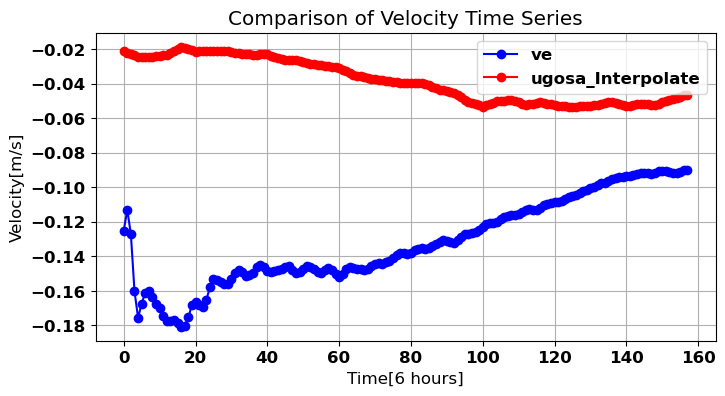

In [21]:
 # Plot time series
plt.figure(figsize=(8, 4))
plt.plot(filtered_values, color='Blue', marker='o', linestyle='-',label='ve')
plt.plot(mean_ugosa_2, color='RED', marker='o', linestyle='-', label='ugosa_Interpolate')
plt.legend([f'Correlation: {correlation:.2f}'], loc='upper left')

# Add title, axis labels, grid and legend 
plt.title('Comparison of Velocity Time Series')
plt.xlabel('Time[6 hours]')
plt.ylabel('Velocity[m/s]')
plt.grid(True)
plt.legend()

# save graphe
plt.savefig("fig15 mode.png")
# Show plot
plt.show()

## Comparison between vn and Interpolated vgosa


## Using Regression and Correlation

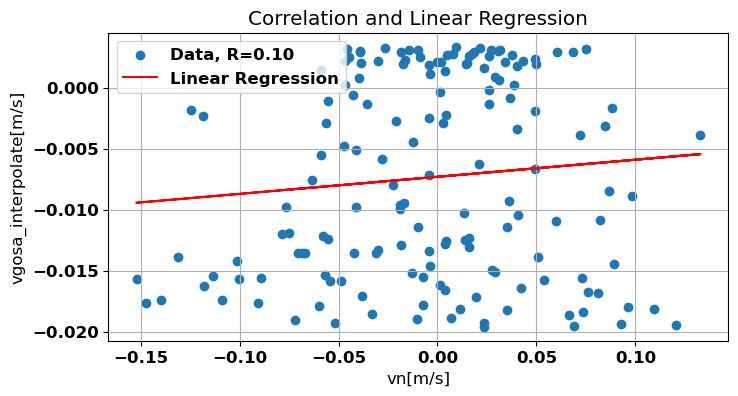

In [22]:
# According to the following, we can simply note that the correlation between "ve" and "ugosa_interpolate" is 0. 
# This indicates a weak relationship between the variables. It means that the variables are slightly related, but the relationship is not very strong.
df_1 = df[0:158]

# Calculate correlation coefficient
correlation_matrix = np.corrcoef(mean_vgosa_2,df_1['vn'])
correlation = correlation_matrix[0, 1]

# Fit linear regression model

slope, intercept, _, _, _ = linregress( df_1['vn'],mean_vgosa_2)

# Plot data and linear regression line
plt.figure(figsize=(8, 4))
plt.scatter(df_1['vn'],mean_vgosa_2, label=f'Data, R={correlation:.2f}')
plt.plot(df_1['vn'], slope*df_1['vn'] + intercept, color='red', label='Linear Regression')
plt.xlabel('vn[m/s]')
plt.ylabel('vgosa_interpolate[m/s]')
plt.legend()
plt.title('Correlation and Linear Regression')
plt.grid(True)

# Set font size and font weight for tick labels
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'

# save graphe
plt.savefig("fig16 mode.png")
# Show plot
plt.show()

## Using Time Series

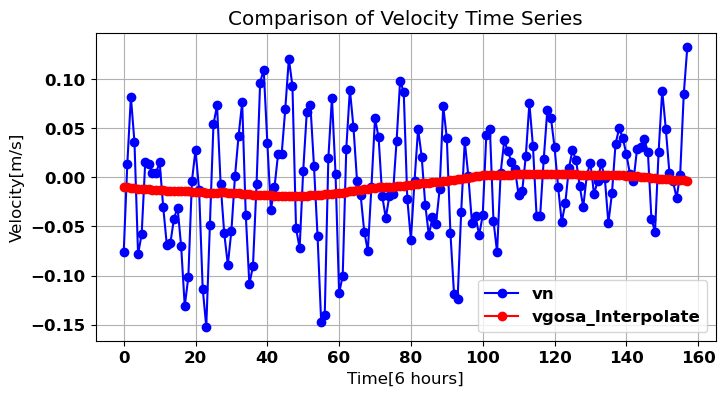

In [41]:
 # Plot time series
plt.figure(figsize=(8, 4))
plt.plot(df_1['vn'], color='Blue', marker='o', linestyle='-',label='vn')
plt.plot(mean_vgosa_2, color='RED', marker='o', linestyle='-', label='vgosa_Interpolate')
plt.legend([f'Correlation: {correlation:.2f}'], loc='upper left')

# Add title, axis labels, grid and legend 
plt.title('Comparison of Velocity Time Series')
plt.xlabel('Time[6 hours]')
plt.ylabel('Velocity[m/s]')
plt.grid(True)
plt.legend()

# save graphe
plt.savefig("fig17 mode.png")
# Show plot
plt.show()

### The use of Kalman filter for smoothing $v_n$

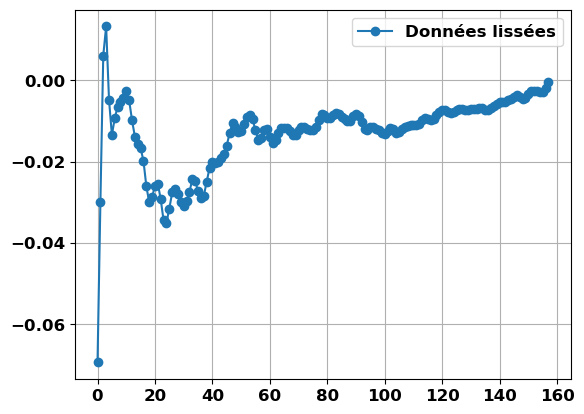

In [26]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter:
    def __init__(self, process_variance, measurement_variance, estimated_measurement_variance):
        self.process_variance = process_variance
        self.measurement_variance = measurement_variance
        self.estimated_measurement_variance = estimated_measurement_variance
        self.posteri_estimate = 0.0
        self.posteri_error_estimate = 1.0

    def update(self, measurement):
        # Prediction update
        priori_estimate = self.posteri_estimate
        priori_error_estimate = self.posteri_error_estimate + self.process_variance

        # Measurement update
        blending_factor = priori_error_estimate / (priori_error_estimate + self.estimated_measurement_variance)
        self.posteri_estimate = priori_estimate + blending_factor * (measurement - priori_estimate)
        self.posteri_error_estimate = (1 - blending_factor) * priori_error_estimate

    def get_latest_estimated_measurement(self):
        return self.posteri_estimate

# Charger la série temporelle
# Supposons que votre série temporelle est dans un array numpy appelé "serie_temporelle"
# Remplacez "serie_temporelle.npy" par le nom de votre fichier contenant la série temporelle
serie_temporelle = df_1['vn']

# Paramètres du filtre de Kalman
process_variance = 1e-5
measurement_variance = 0.1
estimated_measurement_variance = 0.1

# Initialiser le filtre de Kalman
kf = KalmanFilter(process_variance, measurement_variance, estimated_measurement_variance)

# Lisser la série temporelle en utilisant le filtre de Kalman
filtered_values_2 = []
for measurement in serie_temporelle:
    kf.update(measurement)
    filtered_values_2.append(kf.get_latest_estimated_measurement())

# Afficher les données originales et lissées
#plt.plot(df_1['time'],serie_temporelle, marker='o', linestyle='-', label='Données originales')
plt.plot(filtered_values_2, marker='o', linestyle='-', label='Données lissées')
plt.grid(True)
plt.legend()
plt.show()

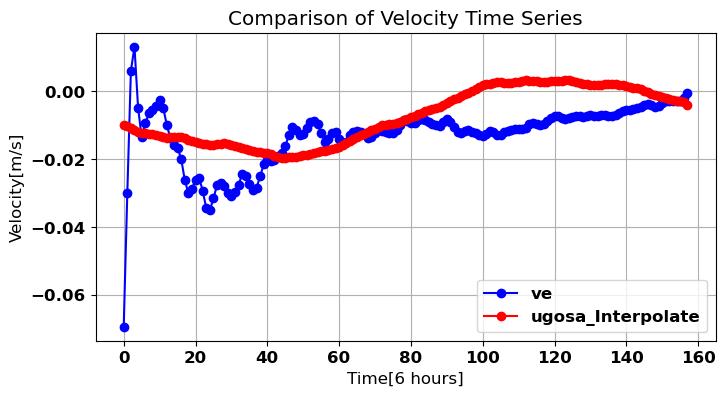

In [24]:
 # Plot time series
plt.figure(figsize=(8, 4))
plt.plot(filtered_values_2, color='Blue', marker='o', linestyle='-',label='ve')
plt.plot(mean_vgosa_2, color='RED', marker='o', linestyle='-', label='vgosa_Interpolate')
plt.legend([f'Correlation: {correlation:.2f}'], loc='upper left')

# Add title, axis labels, grid and legend 
plt.title('Comparison of Velocity Time Series')
plt.xlabel('Time[6 hours]')
plt.ylabel('Velocity[m/s]')
plt.grid(True)
plt.legend()

# save graphe
plt.savefig("fig15 mode.png")
# Show plot
plt.show()

## Conclusion
 - Moderate inverse relationship between the variables ugosa_interpolate (DUACS Current) and ve (Drifter Current).
 - Very weak relationship  between vgosa_interpolate (DUACS Current) and vn (Drifter Current). 
 - Surface currents are difficult to measure both by satellite products represented here by the "DUACS" currents and by drifting buoys represented here by the "Drifter" currents. The difference may be due to inertial or Ekman oscillations, primarily. These assumptions will be the subject of our upcoming notebooks.